# "House Price Prediction"

Anju Ann Paul- Final Project

Objective:
1. Predict the price for a given set of variables.
2. Find the dependent variable for housing price and how dependent they are. Depending on the dependency, a buyer on budget can be made aware on the variables to compromise on.

Dataset Courtesy - kaggle

Dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa that may influences final price of each home.

Import the library

In [1755]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from sklearn import linear_model  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

Use pandas read_csv function to import the data into a dataframe variable

In [1756]:
df=pd.read_csv('Dataset.csv')

Data doesnot have missing data entry. So cleaning won't be necessary.

Summary statistics 

In [1757]:
##collapse_output
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [1758]:
# rows and columns of the dataframe
df.shape

(1460, 81)

In [1759]:
#hide
# First 2 rows of the dataframe
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


Sale Price of homes

<AxesSubplot:ylabel='Frequency'>

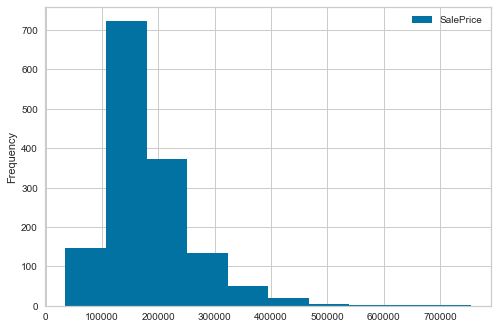

In [1760]:
#Histogram
df.plot(kind='hist',y='SalePrice')

In [1761]:
#Mean price
Col1 = df.loc[:,'SalePrice']
print("Mean of SalePrice is",Col1.mean())

Mean of SalePrice is 180921.19589041095


In [1762]:
#Median price
print("Median of SalePrice is",Col1.median())

Median of SalePrice is 163000.0


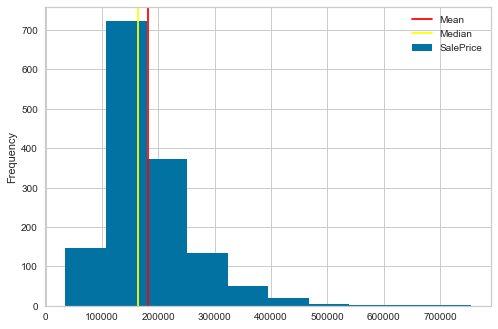

In [1763]:
df.plot(kind='hist',y='SalePrice')
plt.axvline(x=Col1.mean(),color="red", label='Mean')
plt.axvline(x=Col1.median(),color="yellow",label='Median')
plt.legend(loc='best')
plt.show()

In [1764]:
#Mode price
print("Mode of Sale Price is ",Col1.mode())

Mode of Sale Price is  0    140000
dtype: int64


In [1765]:
#MAD
print("Mean Absolute Deviation(MAD) of SalePrice is",Col1.mad())

Mean Absolute Deviation(MAD) of SalePrice is 57434.770275849274


In [1766]:
#STD
print("Standard Deviation(STD) of SalePrice is",Col1.std())

Standard Deviation(STD) of SalePrice is 79442.50288288663


In [1767]:
#interquartile range (the difference of the 75% and 25% quantile)
print("75% quantile is",Col1.quantile(0.75))
print("25% quantile is",Col1.quantile(0.25))
print("Interquartile range (IQR) of SalePrice is",Col1.quantile(0.75) - Col1.quantile(0.25))

75% quantile is 214000.0
25% quantile is 129975.0
Interquartile range (IQR) of SalePrice is 84025.0


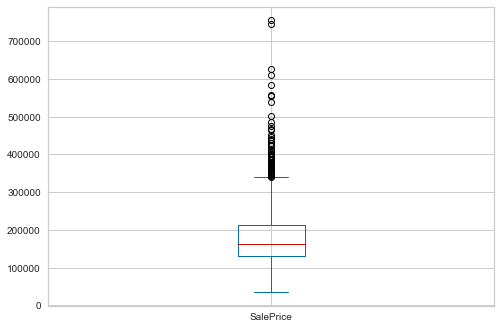

In [1768]:
#Box plot of Sale Price
Col1.plot(kind='box',y='SalePrice');

Plotting OverallCondition of the homes in AMes.

In [1769]:
OC = df.loc[:,'OverallCond']
c1=c2=c3=c4=c5=c6=c7=c8=c9=c10=0   
for i in range(0,len(OC)):
    if OC[i]==1:
       c1+=1
    elif OC[i]==2:
       c2+=1
    elif OC[i]==3:
       c3+=1
    elif OC[i]==4:
       c4+=1
    elif OC[i]==5:
       c5+=1
    elif OC[i]==6:
       c6+=1
    elif OC[i]==7:
       c7+=1
    elif OC[i]==8:
       c8+=1
    elif OC[i]==9:
       c9+=1
    elif OC[i]==10:
       c10+=1       

In [1770]:
a = pd.DataFrame({'OverallCond': [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 ]}, index=['Very Poor',
                                                                          'Poor',
                                                                          'Fair',
                                                                          'Below Average',
                                                                          'Average',
                                                                          'Above Average',
                                                                          'Good',
                                                                         'Very Good',
                                                                          'Excellent',
                                                                         'Very Excellent'])
    


Pie plot of Overall condition of the house 

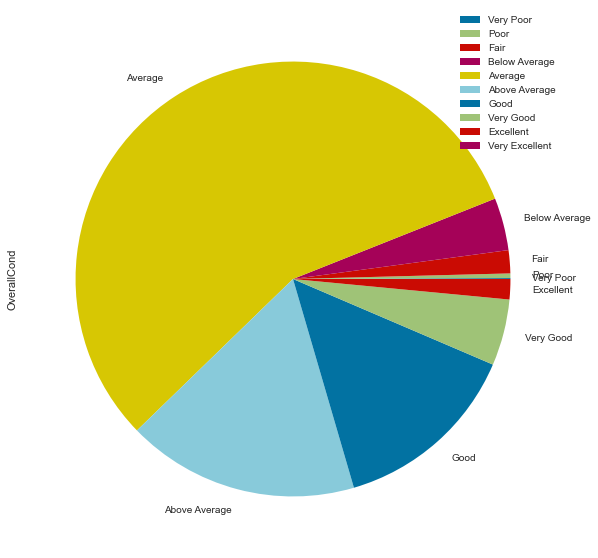

In [1771]:
plot = a.plot.pie(y='OverallCond', figsize=(10, 10))

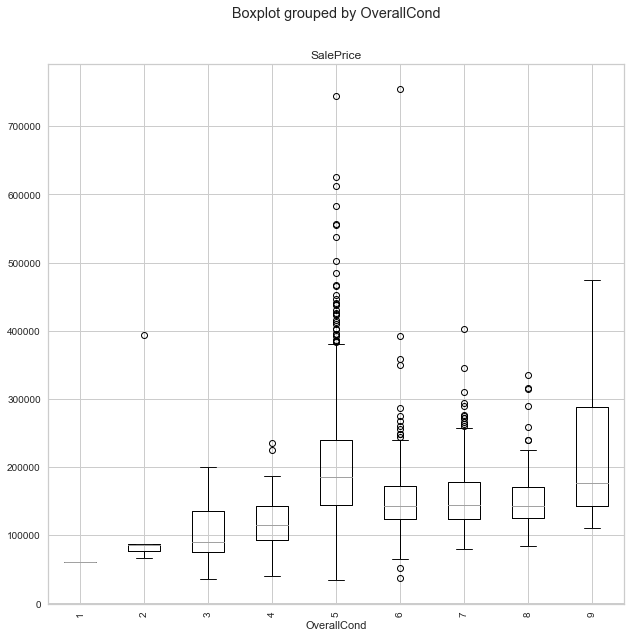

In [1772]:
#Boxplot of OverallCondition Vs SalesPrice
ax = df.boxplot(by='OverallCond', column='SalePrice',
                           figsize=(10, 10),rot=90)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


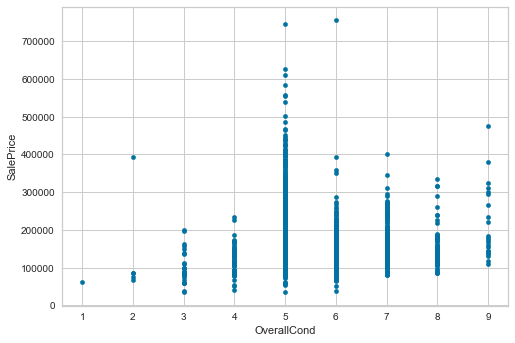

In [1773]:
#Scatterplot of OverallCondition Vs SalesPrice
df.plot.scatter(x='OverallCond',y='SalePrice');

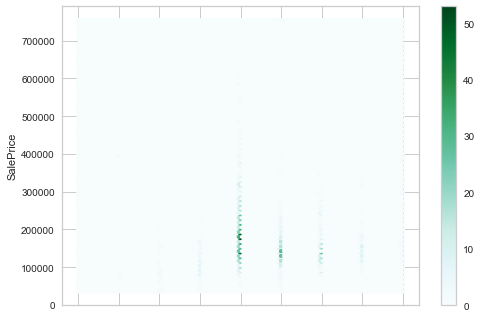

In [1774]:
#Hexagonal binning plot of Overall Condition Vs Sale Price
df.plot.hexbin(x='OverallCond',y='SalePrice');

In [1775]:
Bldty = df.loc[:,'BldgType']
c1=c2=c3=c4=c5=c6=c7=c8=c9=c10=0   
for i in range(0,len(Bldty)):
    if Bldty[i]=='1Fam':
       c1+=1
    elif Bldty[i]=='2fmCon':
       c2+=1
    elif Bldty[i]=='Duplex':
       c3+=1
    elif Bldty[i]=='TwnhsE':
       c4+=1
    elif Bldty[i]=='Twnhs':
       c5+=1

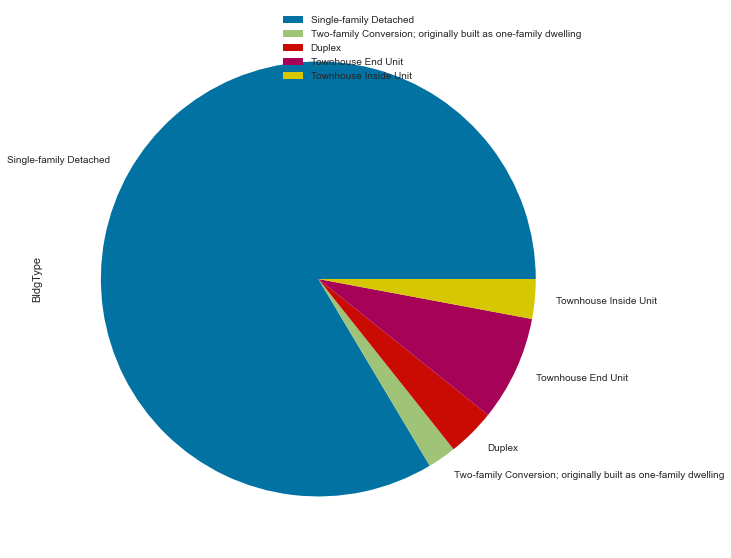

In [1776]:
b = pd.DataFrame({'BldgType': [c1,c2,c3,c4,c5]}, index=['Single-family Detached',
                                                            'Two-family Conversion; originally built as one-family dwelling',
                                                            'Duplex',
                                                            'Townhouse End Unit',
                                                            'Townhouse Inside Unit'])
    
# Types of Building Type       
plot = b.plot.pie(y='BldgType', figsize=(10, 10))

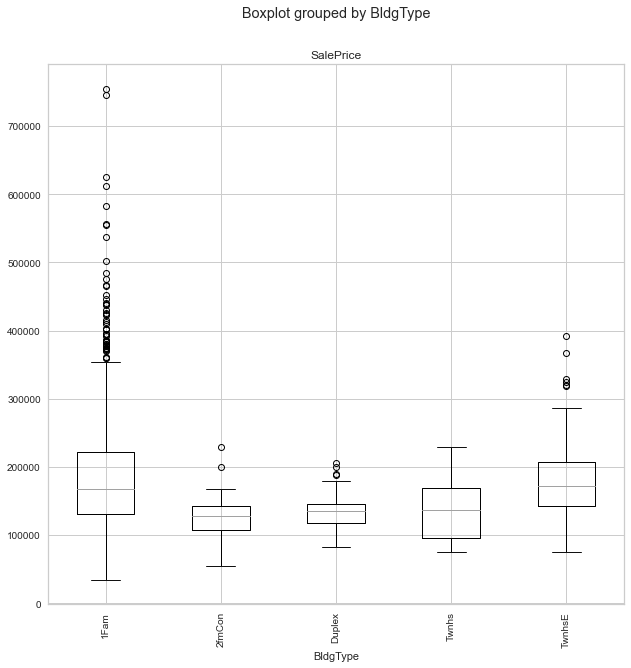

In [1777]:
#Boxplot of Building Type Vs SalePrice
ax = df.boxplot(by='BldgType', column='SalePrice',
                           figsize=(10, 10),rot=90)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


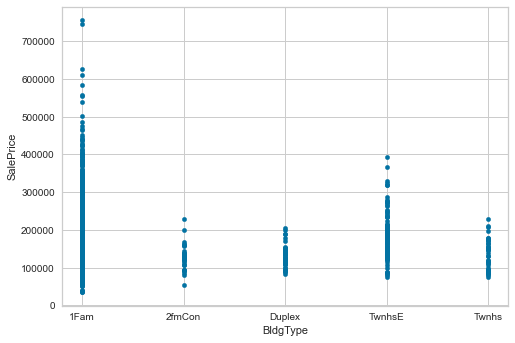

In [1778]:
#Scatterplot of Building Plot Vs SalePrice
df.plot.scatter(x='BldgType',y='SalePrice');

In [1779]:
Corr1 =df.MSSubClass.corr(df.SalePrice)
#Corr2 =df.MSZoning.corr(df.SalePrice)
Corr3 =df.LotFrontage.corr(df.SalePrice)
Corr4 =df.LotArea.corr(df.SalePrice)
#Corr5 =df.Street.corr(df.SalePrice)
#Corr6 =df.Alley.corr(df.SalePrice)
#Corr7 =df.LotShape.corr(df.SalePrice)
#Corr8 =df.LandContour.corr(df.SalePrice)
#Corr9 =df.Utilities.corr(df.SalePrice)
Corr17 =df.OverallQual.corr(df.SalePrice)
Corr18 =df.OverallCond.corr(df.SalePrice)
print("Correlation of Type of dwelling with SalePrice is",Corr1)
#print("Correlation of General Zone Classofication with SalePrice is",Corr2)
print("Correlation of Linear feet of street connected to property with SalePrice is",Corr3)
print("Correlation of Lot size in square feet with SalePrice is",Corr4)
#print("Correlation of Type of road access to property with SalePrice is",Corr5)
#print("Correlation of Type of alley access to property with SalePrice is",Corr6)
#print("Correlation of General shape of property with SalePrice is",Corr7)
#print("Correlation of Flatness of the property with SalePrice is",Corr8)
#print("Correlation of Type of utilities available with SalePrice is",Corr9)
#print("Correlation of Lot configuration with SalePrice is",Corr10)
print("Correlation of Quality with SalePrice is",Corr17)
print("Correlation of Overall Condition with SalePrice is",Corr18)

Correlation of Type of dwelling with SalePrice is -0.08428413512659524
Correlation of Linear feet of street connected to property with SalePrice is 0.3517990965706781
Correlation of Lot size in square feet with SalePrice is 0.2638433538714056
Correlation of Quality with SalePrice is 0.7909816005838052
Correlation of Overall Condition with SalePrice is -0.07785589404867806


Overall quality of the home positively affects the Sale proce whereas Overall Condition of the home do not positively affect the Sale Price.

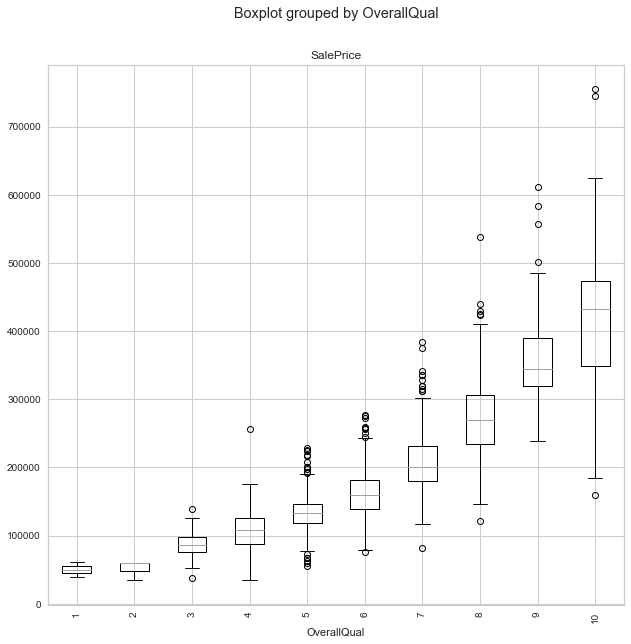

In [1780]:
#Boxplot of OverallQuality Vs SalesPrice
ax = df.boxplot(by='OverallQual', column='SalePrice',
                           figsize=(10, 10),rot=90)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


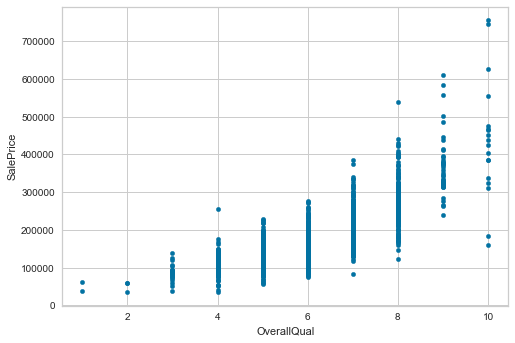

In [1781]:
#Scatterplot of Overall Quality Vs SalePrice
df.plot.scatter(x='OverallQual',y='SalePrice');

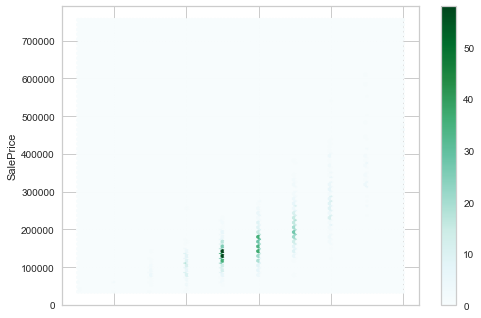

In [1782]:
#Hexagonal binning plot of Overall Quality Vs Sale Price
df.plot.hexbin(x='OverallQual',y='SalePrice');

Linear Regression

In [1783]:
# Split the input data into a training set and test set. We use 80% of data for training and 20% for testing.
OverallQual_train=df.loc[:,'OverallQual']
OverallQual_test = OverallQual_train[-292:]
OverallQual_train= OverallQual_train[:-292]
OverallQual_train = OverallQual_train[:,np.newaxis]
OverallQual_test = OverallQual_test[:,np.newaxis]
print("Train Data size",OverallQual_train.shape)
print("Test Data size",OverallQual_test.shape)

Train Data size (1168, 1)
Test Data size (292, 1)


C:\Users\Anju\AppData\Local\Temp/ipykernel_9868/902679429.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  OverallQual_train = OverallQual_train[:,np.newaxis]
C:\Users\Anju\AppData\Local\Temp/ipykernel_9868/902679429.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  OverallQual_test = OverallQual_test[:,np.newaxis]


In [1784]:
print(OverallQual_train)

[[7]
 [6]
 [7]
 ...
 [7]
 [8]
 [6]]


In [1785]:
# Split the output data/ target into a training set and test set. We use 80% of data for training and 20% for testing.
SalePrice_train = Col1[:-292]
SalePrice_test = Col1[-292:]

In [1786]:
SalePrice_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1163    108959
1164    194000
1165    233170
1166    245350
1167    173000
Name: SalePrice, Length: 1168, dtype: int64

In [1787]:
regr = linear_model.LinearRegression()

In [1788]:
regr.fit(OverallQual_train,SalePrice_train)

LinearRegression()

In [1789]:
SalePrice_pred = regr.predict(OverallQual_test)

In [1790]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(SalePrice_test,SalePrice_pred))
# R squared value/ coefficient of determination: 1 is perfect prediction
print("R squared value: %.2f" % r2_score(SalePrice_test,SalePrice_pred))

Coefficients: 
 [45411.99877916]
Mean squared error: 2630182608.95
R squared value: 0.61


Since R squared value is 0.61, there is a good correlation between Overall Quality and Sale Price.

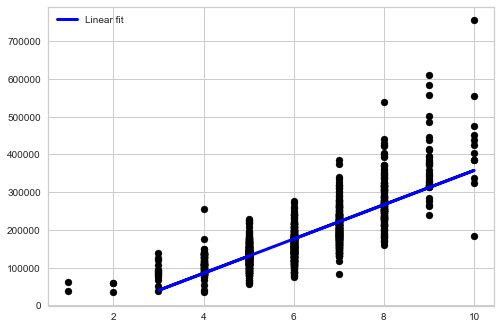

In [1791]:
# Plot the linear fit together with the training data
plt.scatter(OverallQual_train,SalePrice_train, color="black")
plt.plot(OverallQual_test,SalePrice_pred, color="blue", linewidth=3,label='Linear fit')
plt.legend()
plt.show()

Since Sales Price is a positive value, linear fit value which is -ve does not appear in the figure.

Polynomial Regression

In [1792]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [1793]:
poly.fit(OverallQual_train,SalePrice_train)

PolynomialFeatures(degree=3, include_bias=False)

In [1794]:
poly_linreg_model = linear_model.LinearRegression()
polybmi_train = poly.fit_transform(OverallQual_train)
poly_linreg_model.fit(polybmi_train,SalePrice_train)

LinearRegression()

In [1795]:
polybmi_test = poly.fit_transform(OverallQual_test)
ypred = poly_linreg_model.predict(polybmi_test)

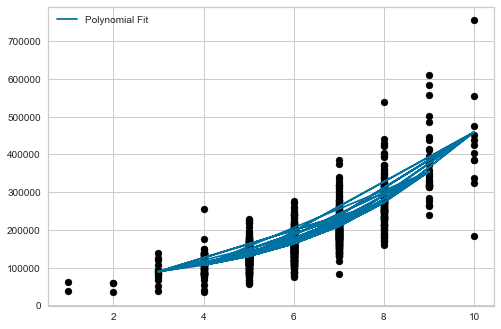

In [1796]:
plt.plot(OverallQual_test, ypred, label="Polynomial Fit")
plt.scatter(OverallQual_train,SalePrice_train, color="black")
plt.legend()
plt.show()

In [1797]:
# The coefficients
print("Coefficients: \n", poly_linreg_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(SalePrice_test,ypred))
# R squared value/ coefficient of determination: 1 is perfect prediction
print("R squared value: %.2f" % r2_score(SalePrice_test,ypred))

Coefficients: 
 [20466.50334059 -3341.53083835   545.11848118]
Mean squared error: 2225063438.72
R squared value: 0.67


In [1798]:
# Split the input data into a training set and test set. We use 80% of data for training and 20% for testing.
GrLivArea_train=df.loc[:,'GrLivArea']
GrLivArea_test = GrLivArea_train[-292:]
GrLivArea_train= GrLivArea_train[:-292]
GrLivArea_train = GrLivArea_train[:,np.newaxis]
GrLivArea_test = GrLivArea_test[:,np.newaxis]
print("Train Data size",GrLivArea_train.shape)
print("Test Data size",GrLivArea_test.shape)

Train Data size (1168, 1)
Test Data size (292, 1)


C:\Users\Anju\AppData\Local\Temp/ipykernel_9868/3323118464.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  GrLivArea_train = GrLivArea_train[:,np.newaxis]
C:\Users\Anju\AppData\Local\Temp/ipykernel_9868/3323118464.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  GrLivArea_test = GrLivArea_test[:,np.newaxis]


In [1799]:
print(GrLivArea_train)

[[1710]
 [1262]
 [1786]
 ...
 [1502]
 [1694]
 [1671]]


In [1800]:
regr.fit(GrLivArea_train,SalePrice_train)

LinearRegression()

In [1801]:
SalePrice_pred = regr.predict(GrLivArea_test)

In [1802]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(SalePrice_test,SalePrice_pred))
# R squared value/ coefficient of determination: 1 is perfect prediction
print("R squared value: %.2f" % r2_score(SalePrice_test,SalePrice_pred))

Coefficients: 
 [113.84071513]
Mean squared error: 4235182093.21
R squared value: 0.37


R squared value is 0.37. Correlation is much less than Overall Quality.

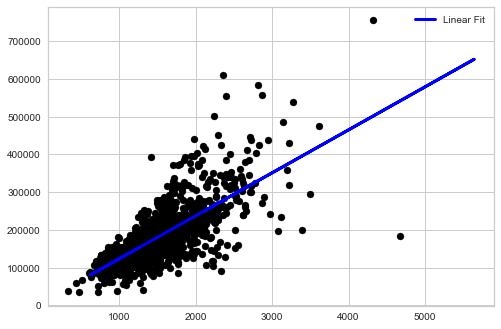

In [1803]:
# Plot the linear fit together with the training data
plt.scatter(GrLivArea_train,SalePrice_train, color="black")
plt.plot(GrLivArea_test,SalePrice_pred, color="blue", linewidth=3,label='Linear Fit')
plt.legend()
plt.show()

In [1804]:
poly.fit(GrLivArea_train,SalePrice_train)

PolynomialFeatures(degree=3, include_bias=False)

In [1805]:
poly_linreg_model = linear_model.LinearRegression()
polybmi_train = poly.fit_transform(GrLivArea_train)
poly_linreg_model.fit(polybmi_train,SalePrice_train)

LinearRegression()

In [1806]:
polybmi_test = poly.fit_transform(GrLivArea_test)
ypred = poly_linreg_model.predict(polybmi_test)

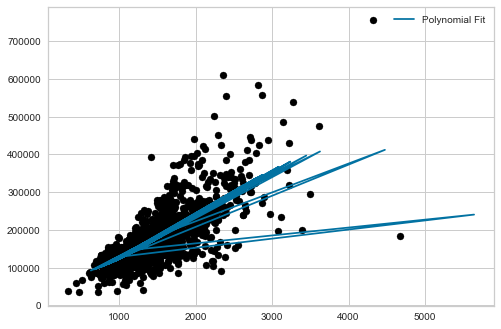

In [1807]:
plt.plot(GrLivArea_test, ypred, label="Polynomial Fit")
plt.scatter(GrLivArea_train,SalePrice_train, color="black")
plt.legend()
plt.show()

Multiple Regression

We need to normalise the data as different variables will have different range of values

In [1808]:
features = df.drop('SalePrice', axis=1)

In [1809]:
features

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [1810]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dropping categorical value features

In [1811]:
features = features.select_dtypes(include='number').copy()

In [1812]:
features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


Dropping ID number and columns with NA values. Dropping MSSubClass because the numbers do not provide any meaningful value

In [1813]:
features = features.drop(['MSSubClass','Id','LotFrontage','MasVnrArea','GarageYrBlt'],axis=1)

In [1814]:
features

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,8450,7,5,2003,2003,706,0,150,856,856,...,548,0,61,0,0,0,0,0,2,2008
1,9600,6,8,1976,1976,978,0,284,1262,1262,...,460,298,0,0,0,0,0,0,5,2007
2,11250,7,5,2001,2002,486,0,434,920,920,...,608,0,42,0,0,0,0,0,9,2008
3,9550,7,5,1915,1970,216,0,540,756,961,...,642,0,35,272,0,0,0,0,2,2006
4,14260,8,5,2000,2000,655,0,490,1145,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,0,0,953,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,13175,6,6,1978,1988,790,163,589,1542,2073,...,500,349,0,0,0,0,0,0,2,2010
1457,9042,7,9,1941,2006,275,0,877,1152,1188,...,252,0,60,0,0,0,0,2500,5,2010
1458,9717,5,6,1950,1996,49,1029,0,1078,1078,...,240,366,0,112,0,0,0,0,4,2010


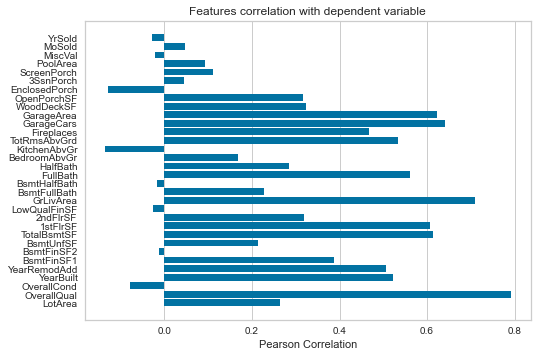

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [1815]:
visualizer = FeatureCorrelation(labels = list(features.columns))
visualizer.fit(features, Col1)
visualizer.poof()

K-Best

In [1816]:
Top10 = SelectKBest(f_regression, k=10).fit(features, Col1)
Topcolumns = features.columns[Top10.get_support()]
Topcolumns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [1817]:
myfeatures = features[Topcolumns]

In [1818]:
myfeatures.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000


In [1819]:
X = pd.DataFrame(data=scale(myfeatures), columns=myfeatures.columns)
y = Col1

In [1820]:
X.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-7.680310e-17,1.032983e-15,4.518912e-15,2.063038e-16,7.686013e-17,-1.446332e-16,2.770995e-16,4.387662e-17,2.585451e-17,-2.022735e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-3.688413e+00,-3.287824e+00,-1.689368e+00,-2.411167e+00,-2.144172e+00,-2.249120e+00,-2.841822e+00,-2.780469e+00,-2.365440e+00,-2.212963e+00
25%,-7.951515e-01,-5.719226e-01,-8.656586e-01,-5.966855e-01,-7.261556e-01,-7.347485e-01,-1.026041e+00,-9.341298e-01,-1.026858e+00,-6.479160e-01
50%,-7.183611e-02,5.737148e-02,4.425864e-01,-1.503334e-01,-1.956933e-01,-9.797004e-02,7.897405e-01,-3.186833e-01,3.117246e-01,3.284429e-02
75%,6.514792e-01,9.516316e-01,9.271216e-01,5.491227e-01,5.915905e-01,4.974036e-01,7.897405e-01,2.967633e-01,3.117246e-01,4.820057e-01
max,2.821425e+00,1.282839e+00,1.217843e+00,1.152095e+01,9.132681e+00,7.855574e+00,2.605522e+00,4.604889e+00,2.988889e+00,4.421526e+00


In [1821]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [1822]:
regr.fit(X_train, y_train)

LinearRegression()

In [1823]:
y_pred = regr.predict(X_test)

In [1824]:
p = pd.DataFrame({'test': y_test, 'Predicted': y_pred})

In [1825]:
p.head(292)

,test,Predicted
1356,110000,106061.904248
400,245500,227769.770184
961,272000,259592.214627
800,200000,183843.080957
1220,115000,107269.318234
...,...,...
1142,424870,321905.009679
965,178900,182176.802169
719,128500,114842.006999
1057,248000,217736.930445


In [1826]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# R squared value/ coefficient of determination: 1 is perfect prediction
print("R squared value: %.2f" % r2_score(y_test,y_pred))
score = regr.score(X_train, y_train)
print('Score: {}'.format(score))
stddevscore = np.sqrt(mean_squared_error(y_test, y_pred))
print('Standard deviation score: {}'.format(stddevscore))

Coefficients: 
 [27734.03491028  8605.85372476  6025.07061821  7306.65090344
  5986.02059705 23210.33194148 -3750.71537459  1751.70094373
  8551.36667026  3278.52093316]
Mean squared error: 1203578503.15
R squared value: 0.82
Score: 0.7592054817332723
Standard deviation score: 34692.62894549763


Taking top 4 variables

In [1827]:
Top4 = SelectKBest(f_regression, k=4).fit(features, Col1)
Topcolumns = features.columns[Top4.get_support()]
Topcolumns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

Top Qualities which affect the Sale Price are Overall Quality, Above Ground Living Area square feet, Size of Garage in Car capacity and size of Garage in sq feet.

In [1828]:
myfeatures = features[Topcolumns]

In [1829]:
X = pd.DataFrame(data=scale(myfeatures), columns=myfeatures.columns)
y = Col1

In [1830]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [1831]:
regr.fit(X_train, y_train)

LinearRegression()

In [1832]:
y_pred = regr.predict(X_test)

In [1833]:
p = pd.DataFrame({'test': y_test, 'Predicted': y_pred})

In [1834]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# R squared value/ coefficient of determination: 1 is perfect prediction
print("R squared value: %.2f" % r2_score(y_test,y_pred))
score = regr.score(X_train, y_train)
print('Score: {}'.format(score))
stddevscore = np.sqrt(mean_squared_error(y_test, y_pred))
print('Standard deviation score: {}'.format(stddevscore))

Coefficients: 
 [36221.603516   24975.32612471  9738.34288192  9307.78973081]
Mean squared error: 1555170713.55
R squared value: 0.75
Score: 0.7402311619898319
Standard deviation score: 39435.652822669


Taking all variables

In [1835]:
Top32 = SelectKBest(f_regression, k=32).fit(features, Col1)
Topcolumns = features.columns[Top32.get_support()]
Topcolumns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [1836]:
myfeatures = features[Topcolumns]

In [1837]:
X = pd.DataFrame(data=scale(myfeatures), columns=myfeatures.columns)
y = Col1

In [1838]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [1839]:
regr.fit(X_train, y_train)

LinearRegression()

In [1840]:
y_pred = regr.predict(X_test)

In [1841]:
p = pd.DataFrame({'test': y_test, 'Predicted': y_pred})

In [1842]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# R squared value/ coefficient of determination: 1 is perfect prediction
print("R squared value: %.2f" % r2_score(y_test,y_pred))
score = regr.score(X_train, y_train)
print('Score: {}'.format(score))
stddevscore = np.sqrt(mean_squared_error(y_test, y_pred))
print('Standard deviation score: {}'.format(stddevscore))

Coefficients: 
 [ 4.67848840e+03  2.46343853e+04  5.45552763e+03  9.65622187e+03
  2.97757797e+03 -2.13820341e+16 -7.56270255e+15 -2.07148736e+16
  2.05666553e+16  2.23382359e+15  2.52239640e+15  2.80959212e+14
 -3.03638828e+15  4.30870251e+03 -4.80046179e+00  1.31373033e+03
 -6.77493707e+01 -6.13454954e+03 -5.12031254e+03  7.71832836e+03
  2.20558250e+03  9.00855958e+03  5.31905245e+02  4.16506219e+03
 -9.85024966e+02  3.98409167e+02 -6.24505288e+02  4.22248173e+03
 -1.51831728e+03 -3.79313585e+02  2.32017611e+02 -1.33590800e+03]
Mean squared error: 1203221847.73
R squared value: 0.81
Score: 0.8004505379709943
Standard deviation score: 34687.488345717866


Prediction was better when all the 33 variables were taken into consideration. Taking top 10 variables also showed similar results. Taking just 4 variables show a worse result.

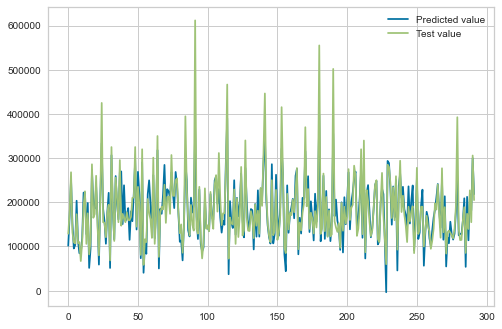

In [1843]:
plt.plot(y_pred,label="Predicted value")
plt.plot(np.array(y_test),label="Test value")
plt.legend(loc='best')
plt.show()

From the figure, we can see that test values and Predicted values are similar. 
Let's do a T- test to check if there ia statistically significant difference between test values and predicted values

In [1844]:
scipy.stats.ttest_ind(y_test, y_pred)

Ttest_indResult(statistic=0.26156612676488183, pvalue=0.7937485008326826)

Since p value= 0.747 (> 0.05), it is concluded that there is no statistically significant difference between the test values and predicted values  